## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Jun  2 05:51:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


## Install YOLOv8

In [ ]:
# Install YOLOv8 package and set up the display environment
!pip install ultralytics

from IPython import display
display.clear_output()
from IPython.display import display, Image
# Import Ultralytics and check system compatibility (GPU, Python version etc.)

import ultralytics
ultralytics.checks()

# Load the YOLOv8 model class for detection tasks
from ultralytics import YOLO

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DR4agSFbtjXAg0cXPCmj") # Initialize Roboflow object with your API key
# Access the specific workspace and project, then select version 9 of the dataset
project = rf.workspace("navuluru-venkata-bharani-subramanya-kumar-wpqql").project("dottttta1.0")
version = project.version(9)
# Download the dataset in YOLOv8 format with oriented bounding boxes (OBB)
dataset = version.download("yolov8-obb")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dottttta1.0-9 in yolov8-obb:: 100%|██████████| 7226/7226 [00:01<00:00, 4674.83it/s]


## Validate Custom Model

## Custom Training

In [ ]:
%cd {HOME}
# Train YOLOv8 OBB model for 10 epochs on the specified dataset and save weights
!yolo task=obb mode=train model=yolov8s-obb.pt data=/content/datasets/datasets/dottttta1.0-9/data.yaml epochs=25 imgsz=640 batch=16 save=true

/content/datasets
100% 22.2M/22.2M [00:00<00:00, 183MB/s]
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/datasets/dottttta1.0-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto,

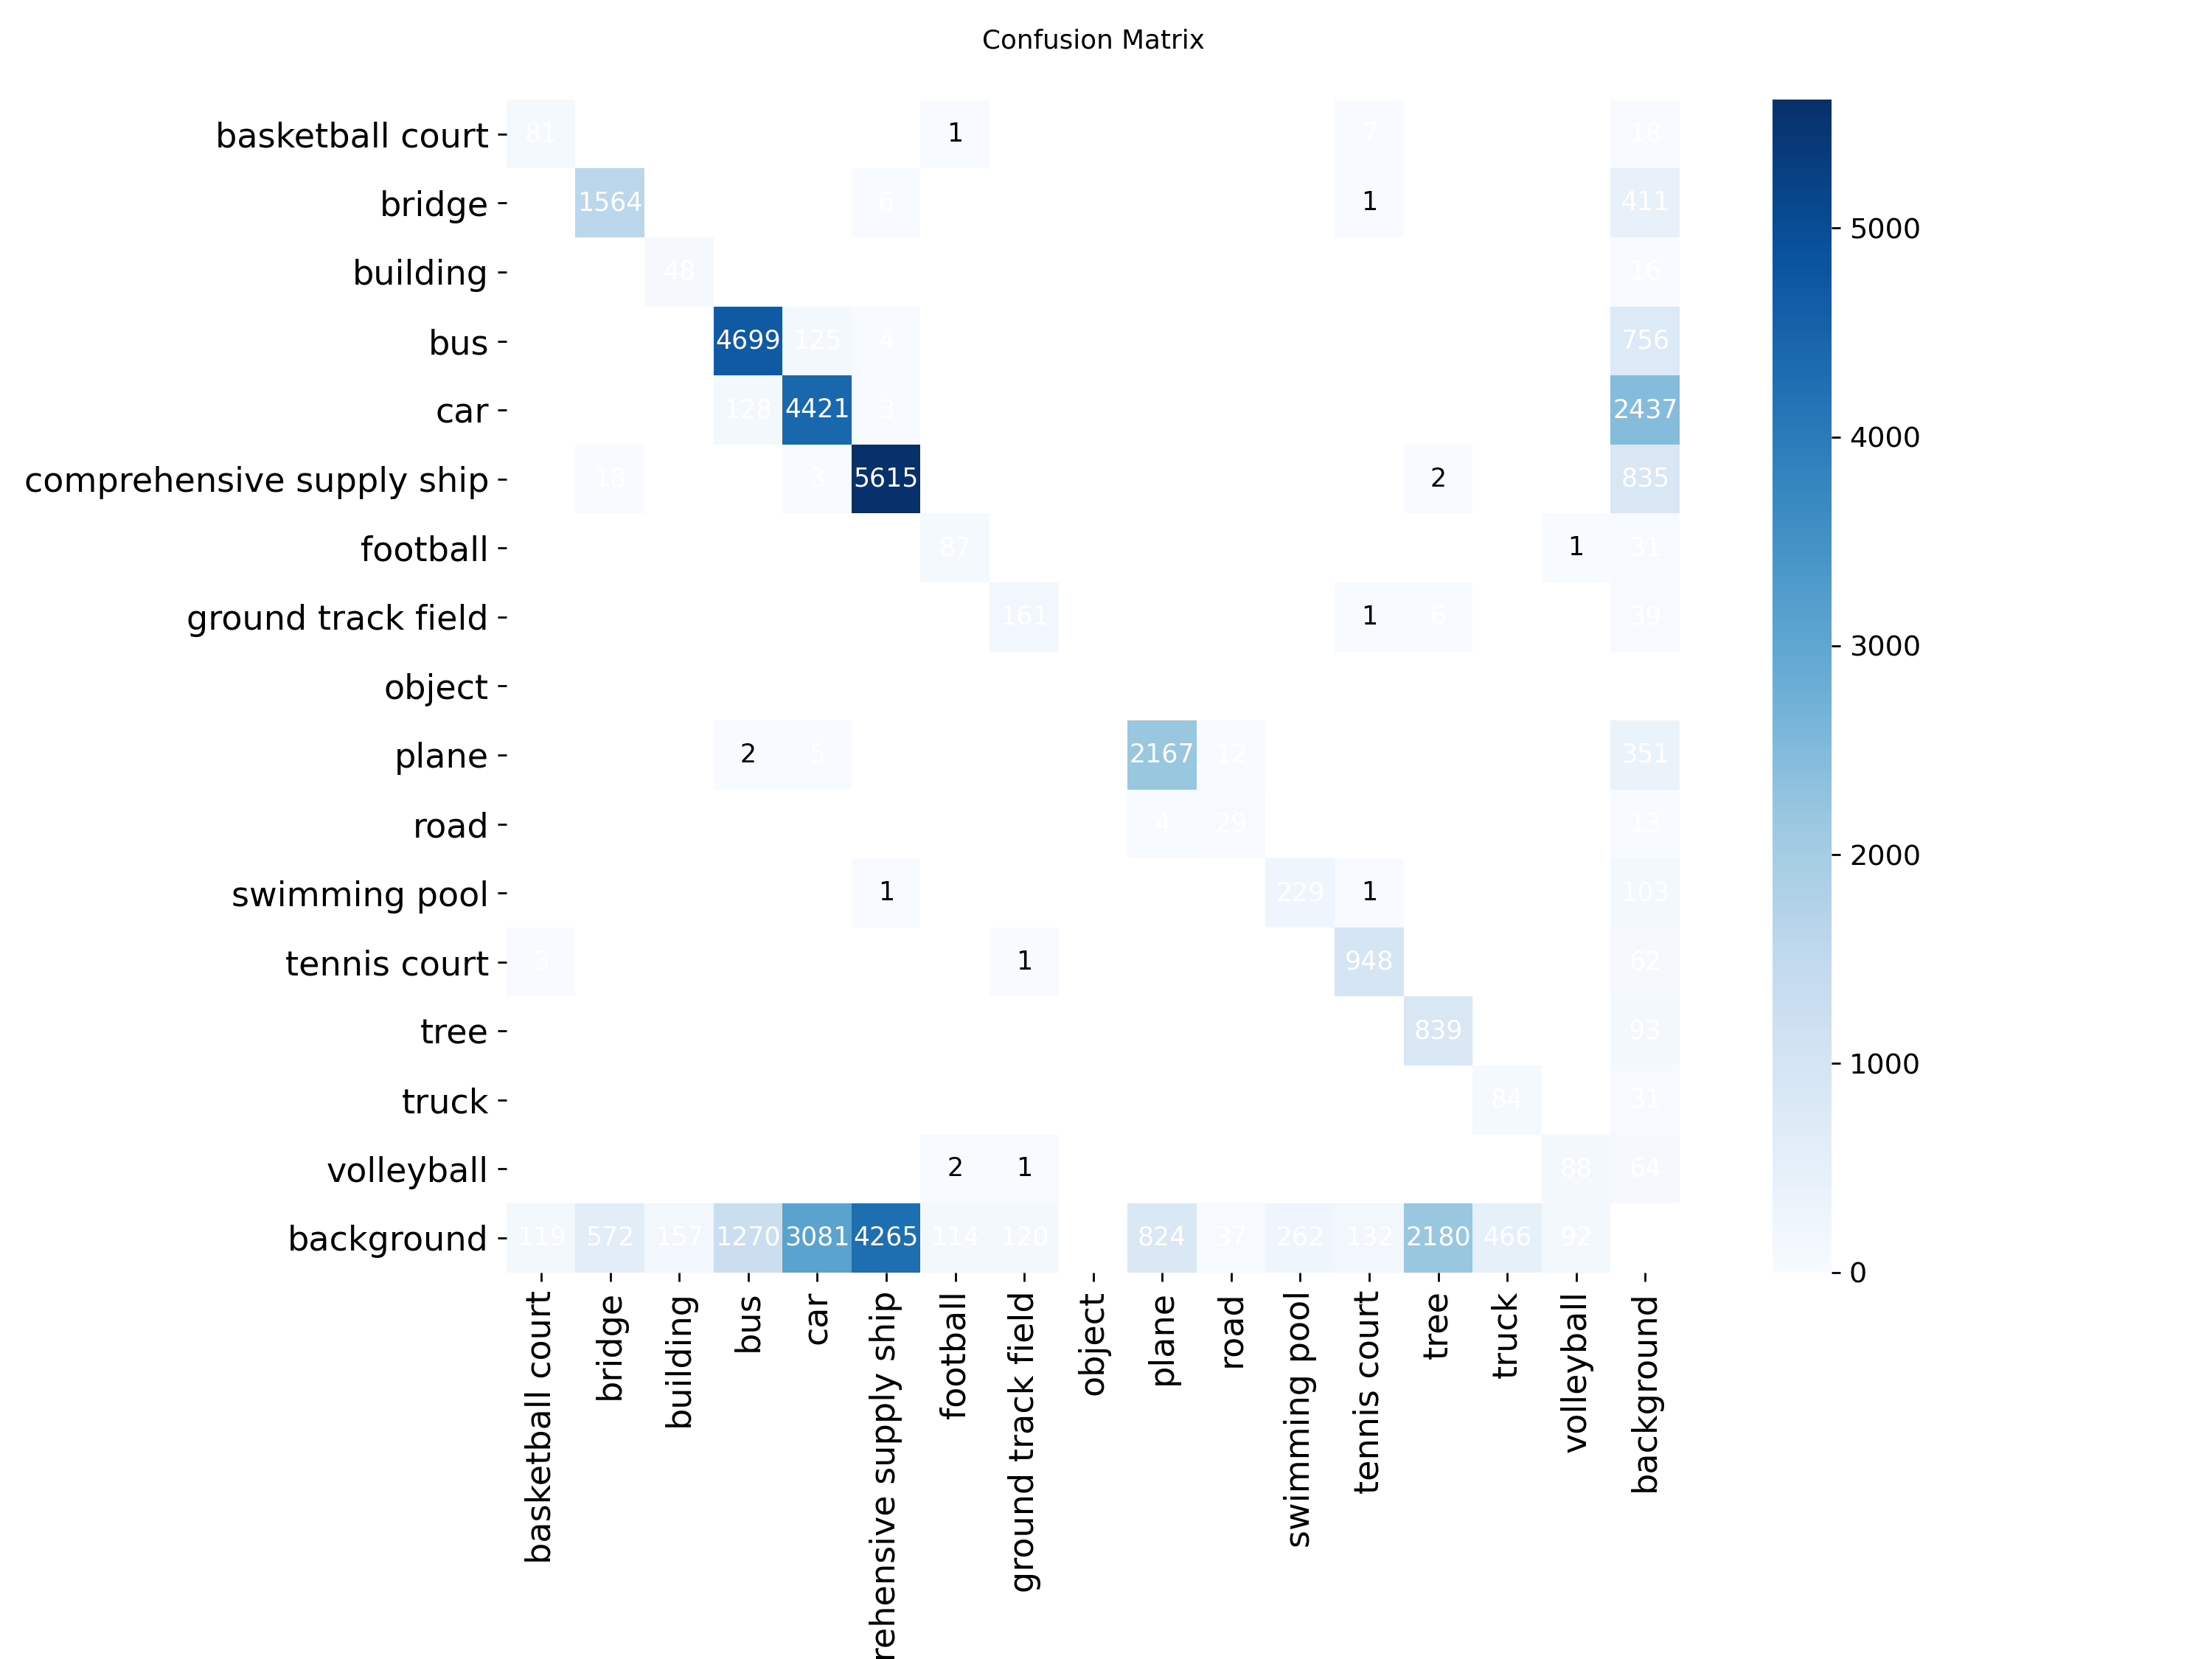

In [ ]:
%cd {HOME}
# CONFUSTION MATRIX
from IPython import display
display.clear_output()
from IPython.display import display, Image
Image(filename='/content/datasets/runs/obb/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
# Run validation on the trained YOLOv8 OBB model
!yolo task=obb mode=val model=/content/datasets/runs/obb/train/weights/best.pt data=/content/datasets/datasets/dottttta1.0-9/data.yaml

# task=obb: oriented bounding box detection task
# mode=val: validation mode to evaluate the model performance
# model=.../best.pt: path to the best saved model weights from training
# data=.../data.yaml: path to the dataset config file for validation

/content/datasets
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-obb summary (fused): 81 layers, 11,417,763 parameters, 0 gradients, 29.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1986.2±681.3 MB/s, size: 77.1 KB)
val: Scanning /content/datasets/datasets/dottttta1.0-9/valid/labels.cache... 610 images, 1 backgrounds, 1 corrupt: 100% 610/610 [00:00<?, ?it/s]
val: /content/datasets/datasets/dottttta1.0-9/valid/images/P2301_jpg.rf.fcc19377ab35551cefc348b159196376.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0242]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 39/39 [01:01<00:00,  1.59s/it]
                   all        609      35089      0.799      0.498       0.56      0.401
      basketball court         56        203       0.78      0.409      0.464      0.386
                bridge        124       2154      0.818      0.695      0.754   

In [ ]:
# Data from your logs
classes = [
    "basketball court", "bridge", "building", "bus", "car", "comprehensive supply ship",
    "football", "ground track field", "plane", "road", "swimming pool",
    "tennis court", "tree", "truck", "volleyball"
]

instances = [203, 2154, 205, 6099, 7635, 9894, 204, 283, 2995, 78, 491, 1090, 3027, 550, 181]
precision = [0.638, 0.798, 0.724, 0.774, 0.571, 0.837, 0.566, 0.866, 0.868, 0.644, 0.656, 0.908, 0.886, 0.763, 0.719]
recall = [0.419, 0.646, 0.229, 0.792, 0.590, 0.570, 0.460, 0.478, 0.690, 0.397, 0.458, 0.849, 0.263, 0.164, 0.410]

# Initialize variables
class_wise_accuracy = []

# Calculate metrics for each class
for i in range(len(classes)):
    # True Positives (TP)
    tp = recall[i] * instances[i]
    # False Negatives (FN)
    fn = instances[i] - tp
    # False Positives (FP)
    fp = (tp / precision[i]) - tp if precision[i] > 0 else 0
    # True Negatives (TN)
    tn = sum(instances) - (tp + fp + fn)
    # Class-wise accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    class_wise_accuracy.append(accuracy)

# Display results
print("Class-Wise Accuracy:")
for i, cls in enumerate(classes):
    print(f"Class: {cls}, Accuracy: {class_wise_accuracy[i]:.3f}")


Class-Wise Accuracy:
Class: basketball court, Accuracy: 0.995
Class: bridge, Accuracy: 0.968
Class: building, Accuracy: 0.995
Class: bus, Accuracy: 0.924
Class: car, Accuracy: 0.814
Class: comprehensive supply ship, Accuracy: 0.847
Class: football, Accuracy: 0.995
Class: ground track field, Accuracy: 0.995
Class: plane, Accuracy: 0.965
Class: road, Accuracy: 0.998
Class: swimming pool, Accuracy: 0.989
Class: tennis court, Accuracy: 0.993
Class: tree, Accuracy: 0.934
Class: truck, Accuracy: 0.986
Class: volleyball, Accuracy: 0.996


/content/datasets


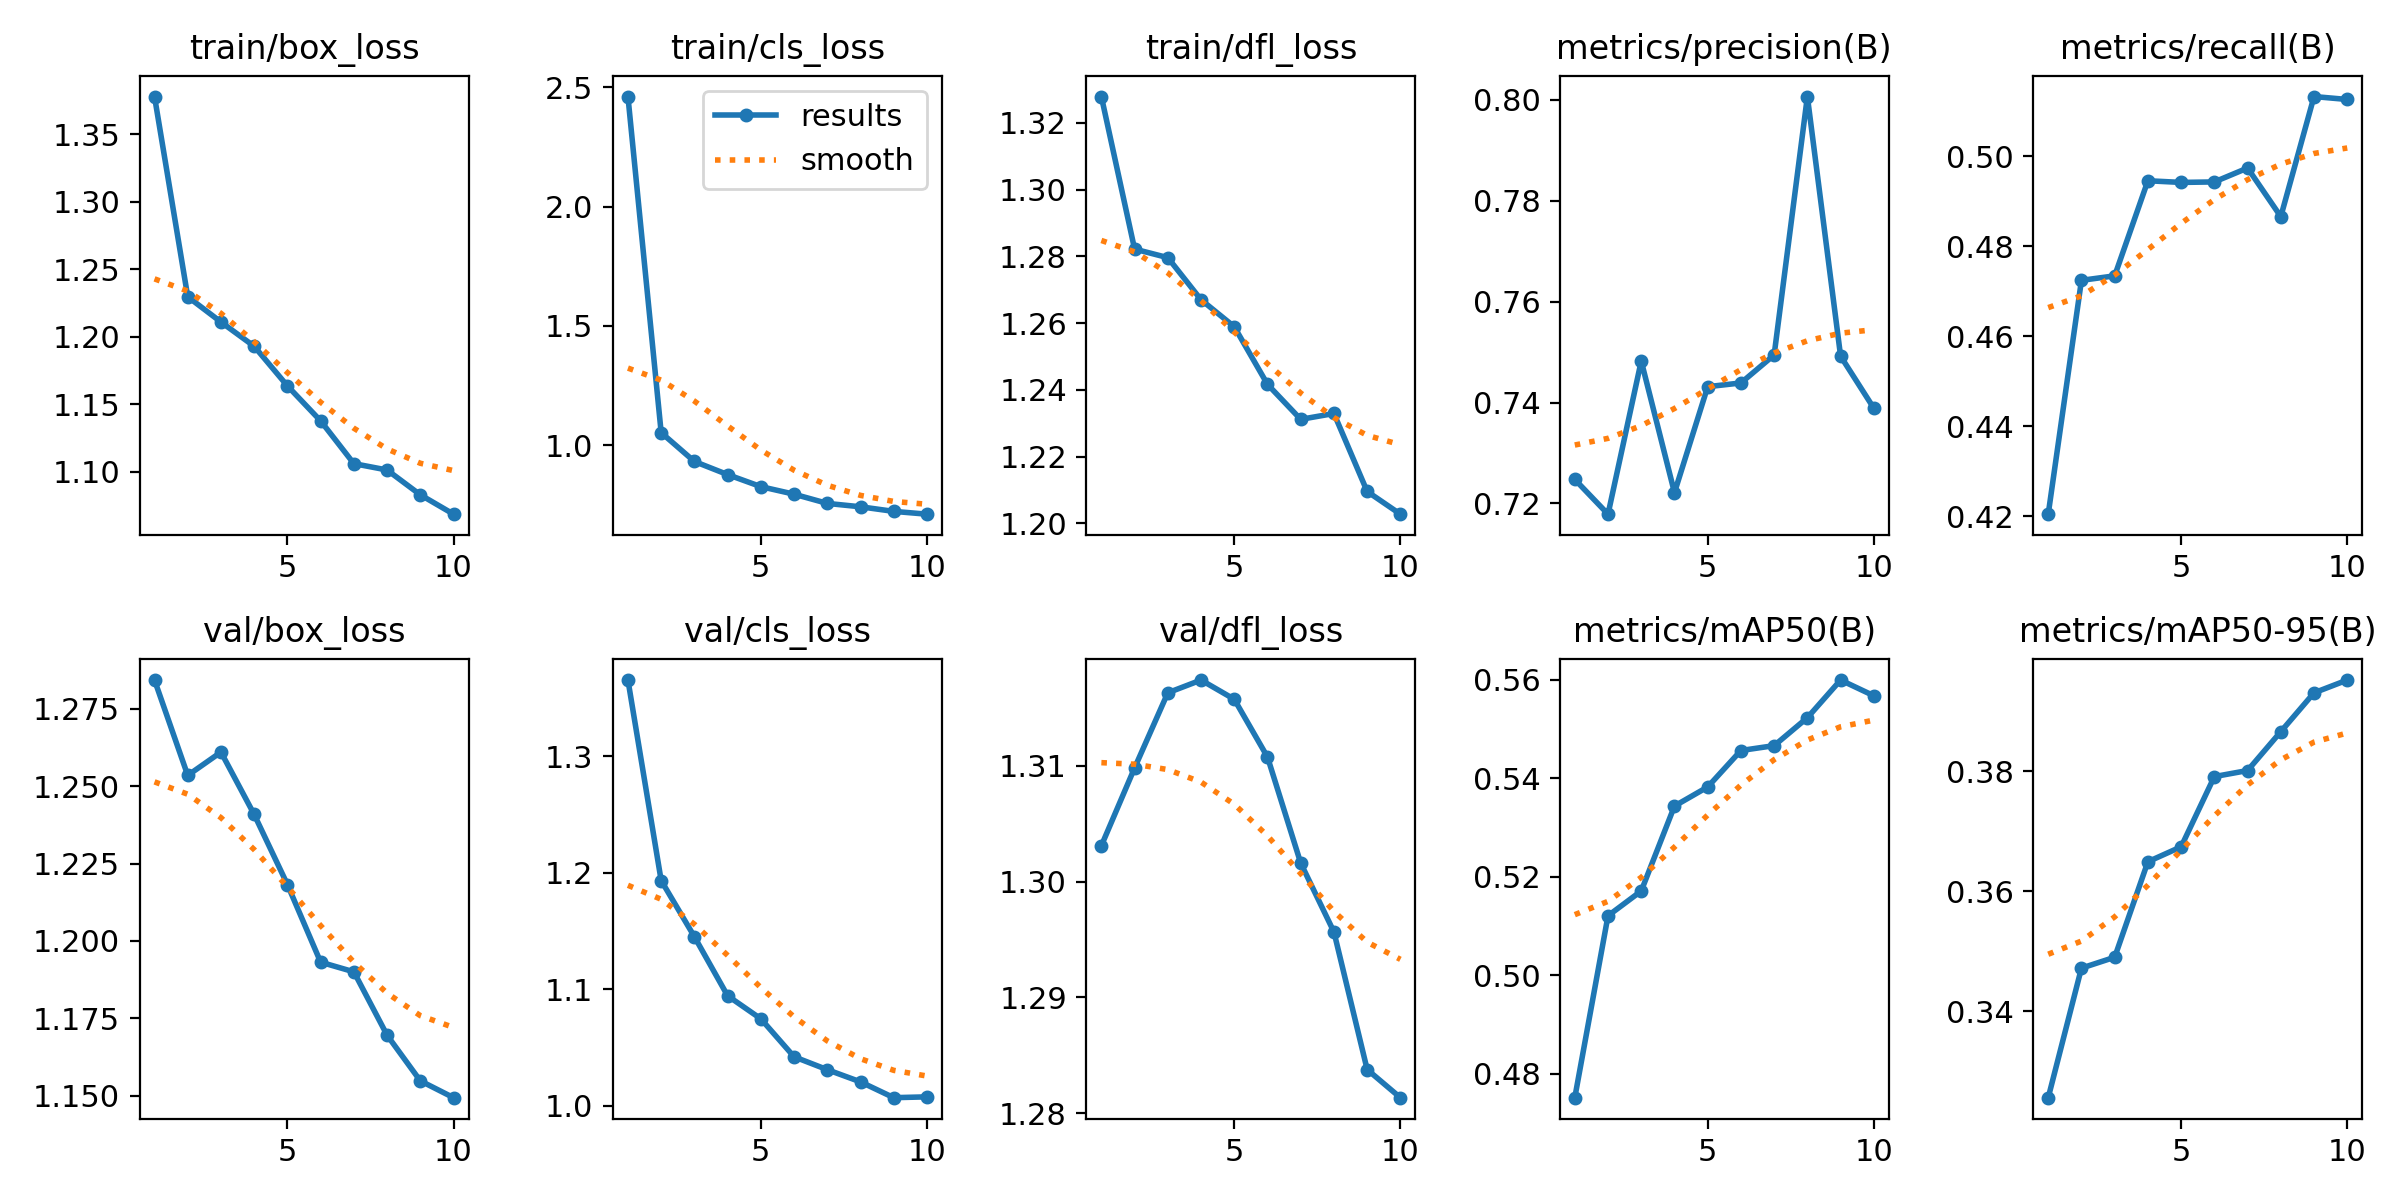

In [ ]:
%cd {HOME}
Image(filename='/content/datasets/runs/obb/train/results.png', width=600)

/content/datasets


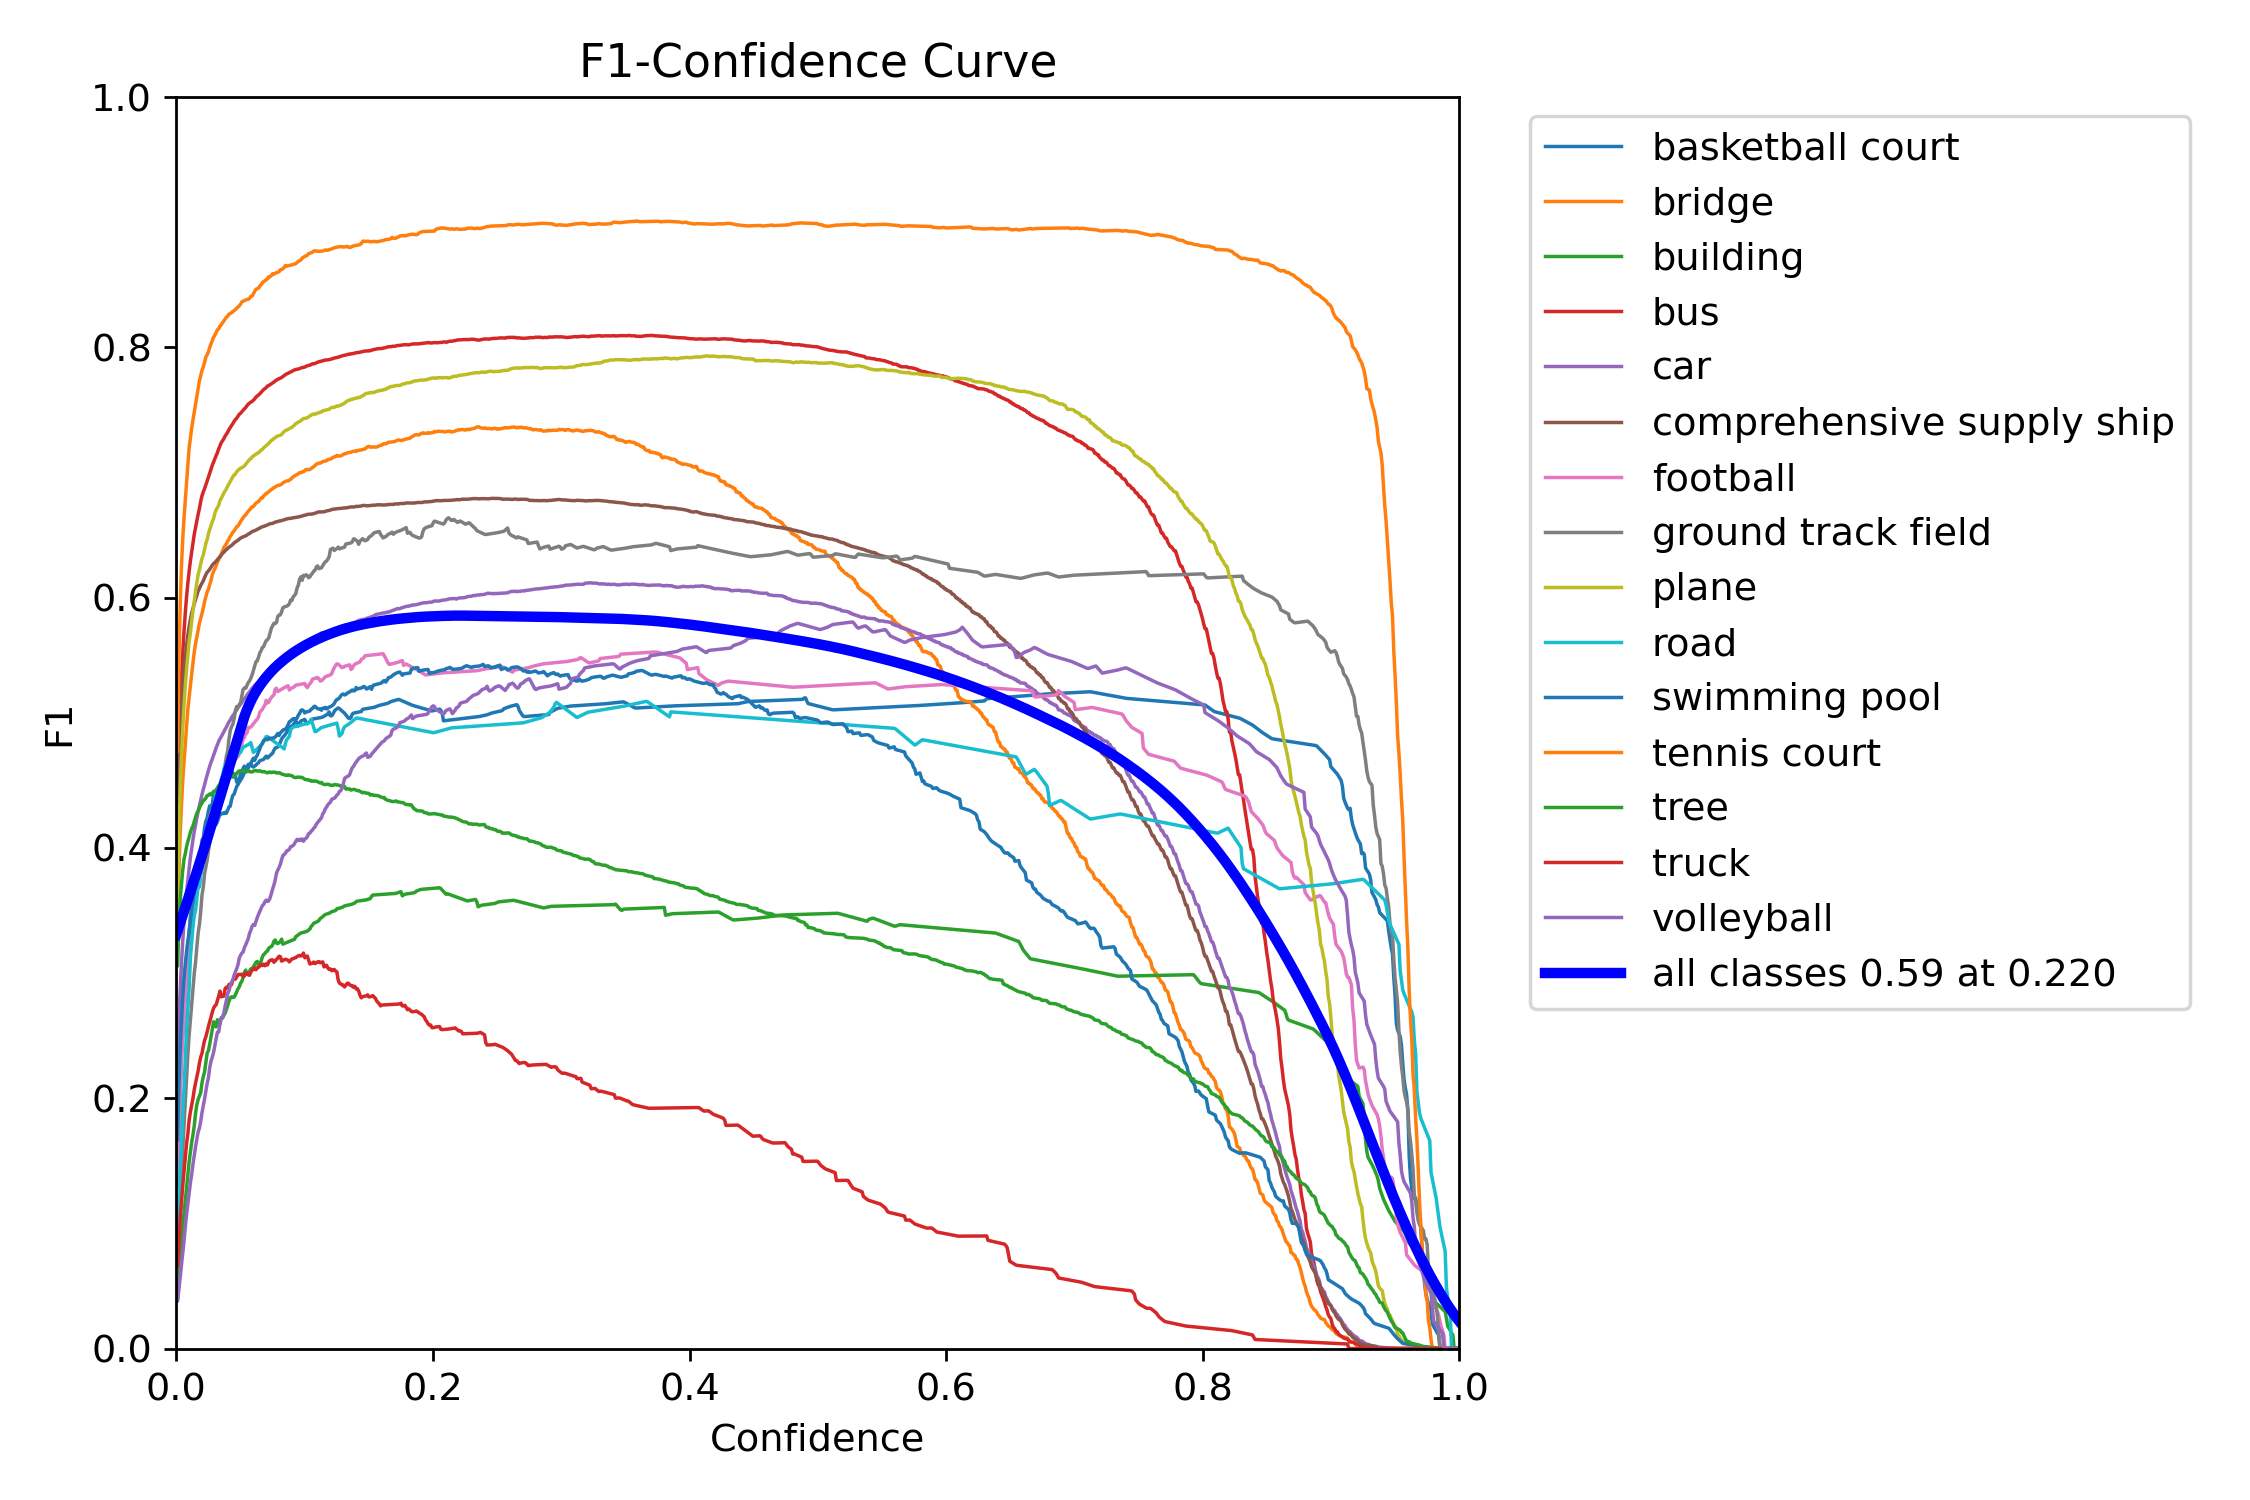

In [ ]:
%cd {HOME}
Image(filename='/content/datasets/runs/obb/train/F1_curve.png', width=600)

/content/datasets


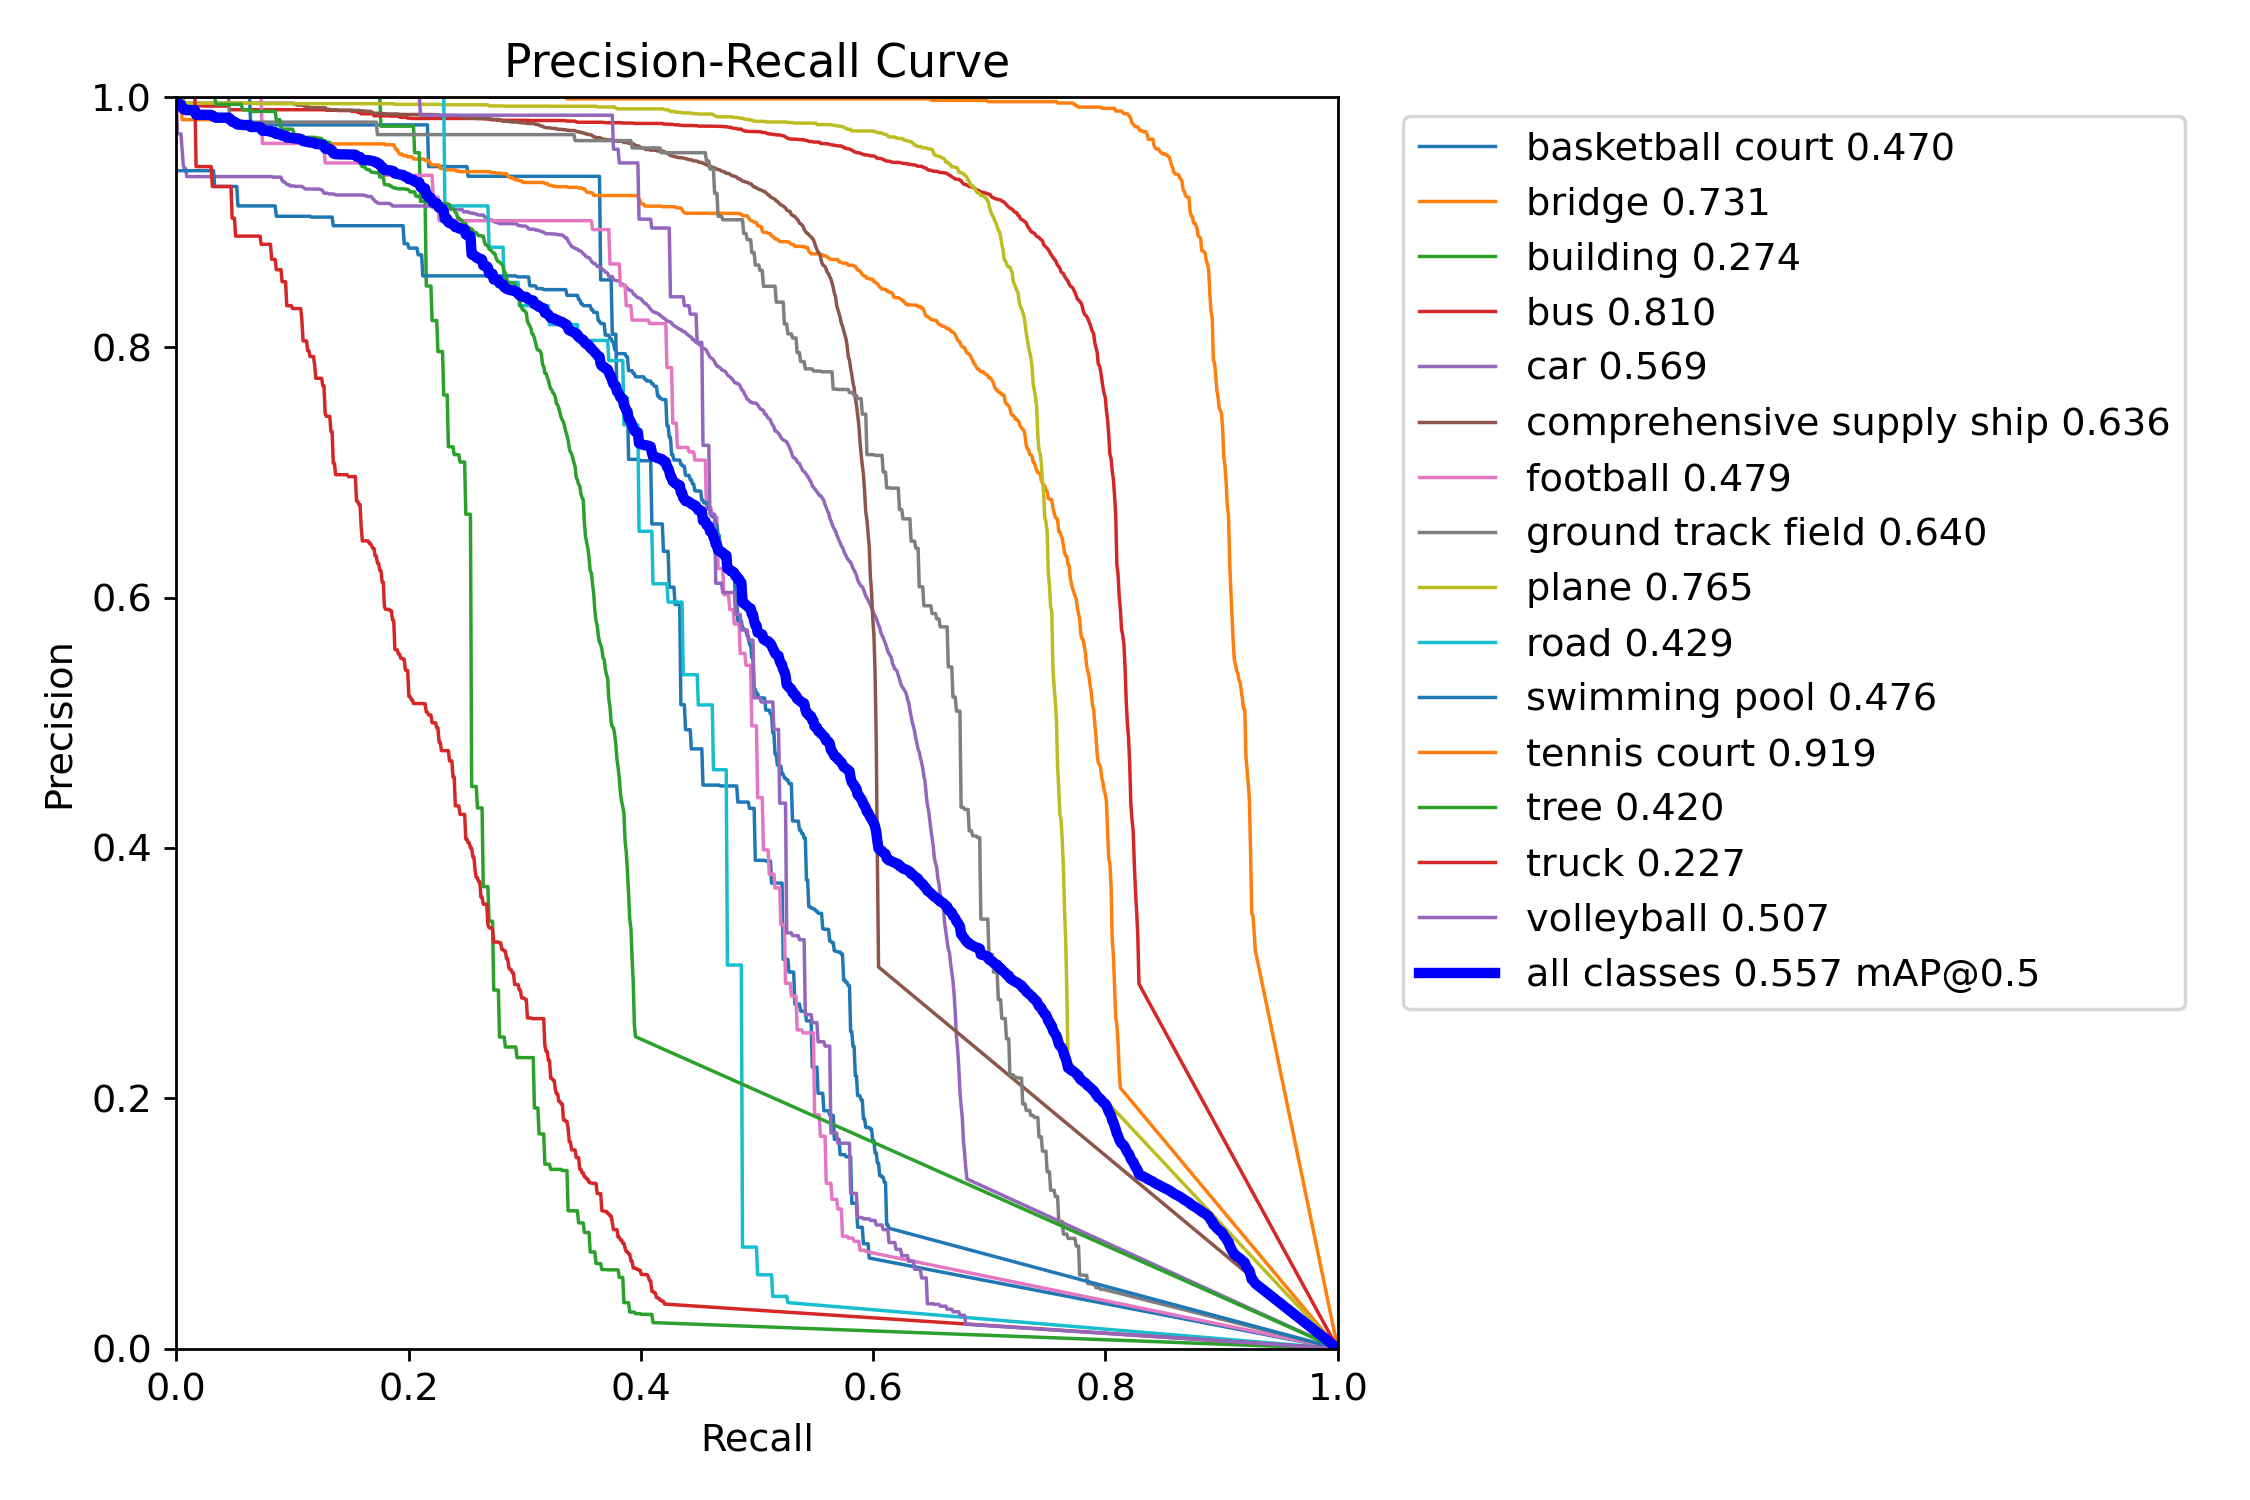

In [ ]:
%cd {HOME}
Image(filename='/content/datasets/runs/obb/train/PR_curve.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


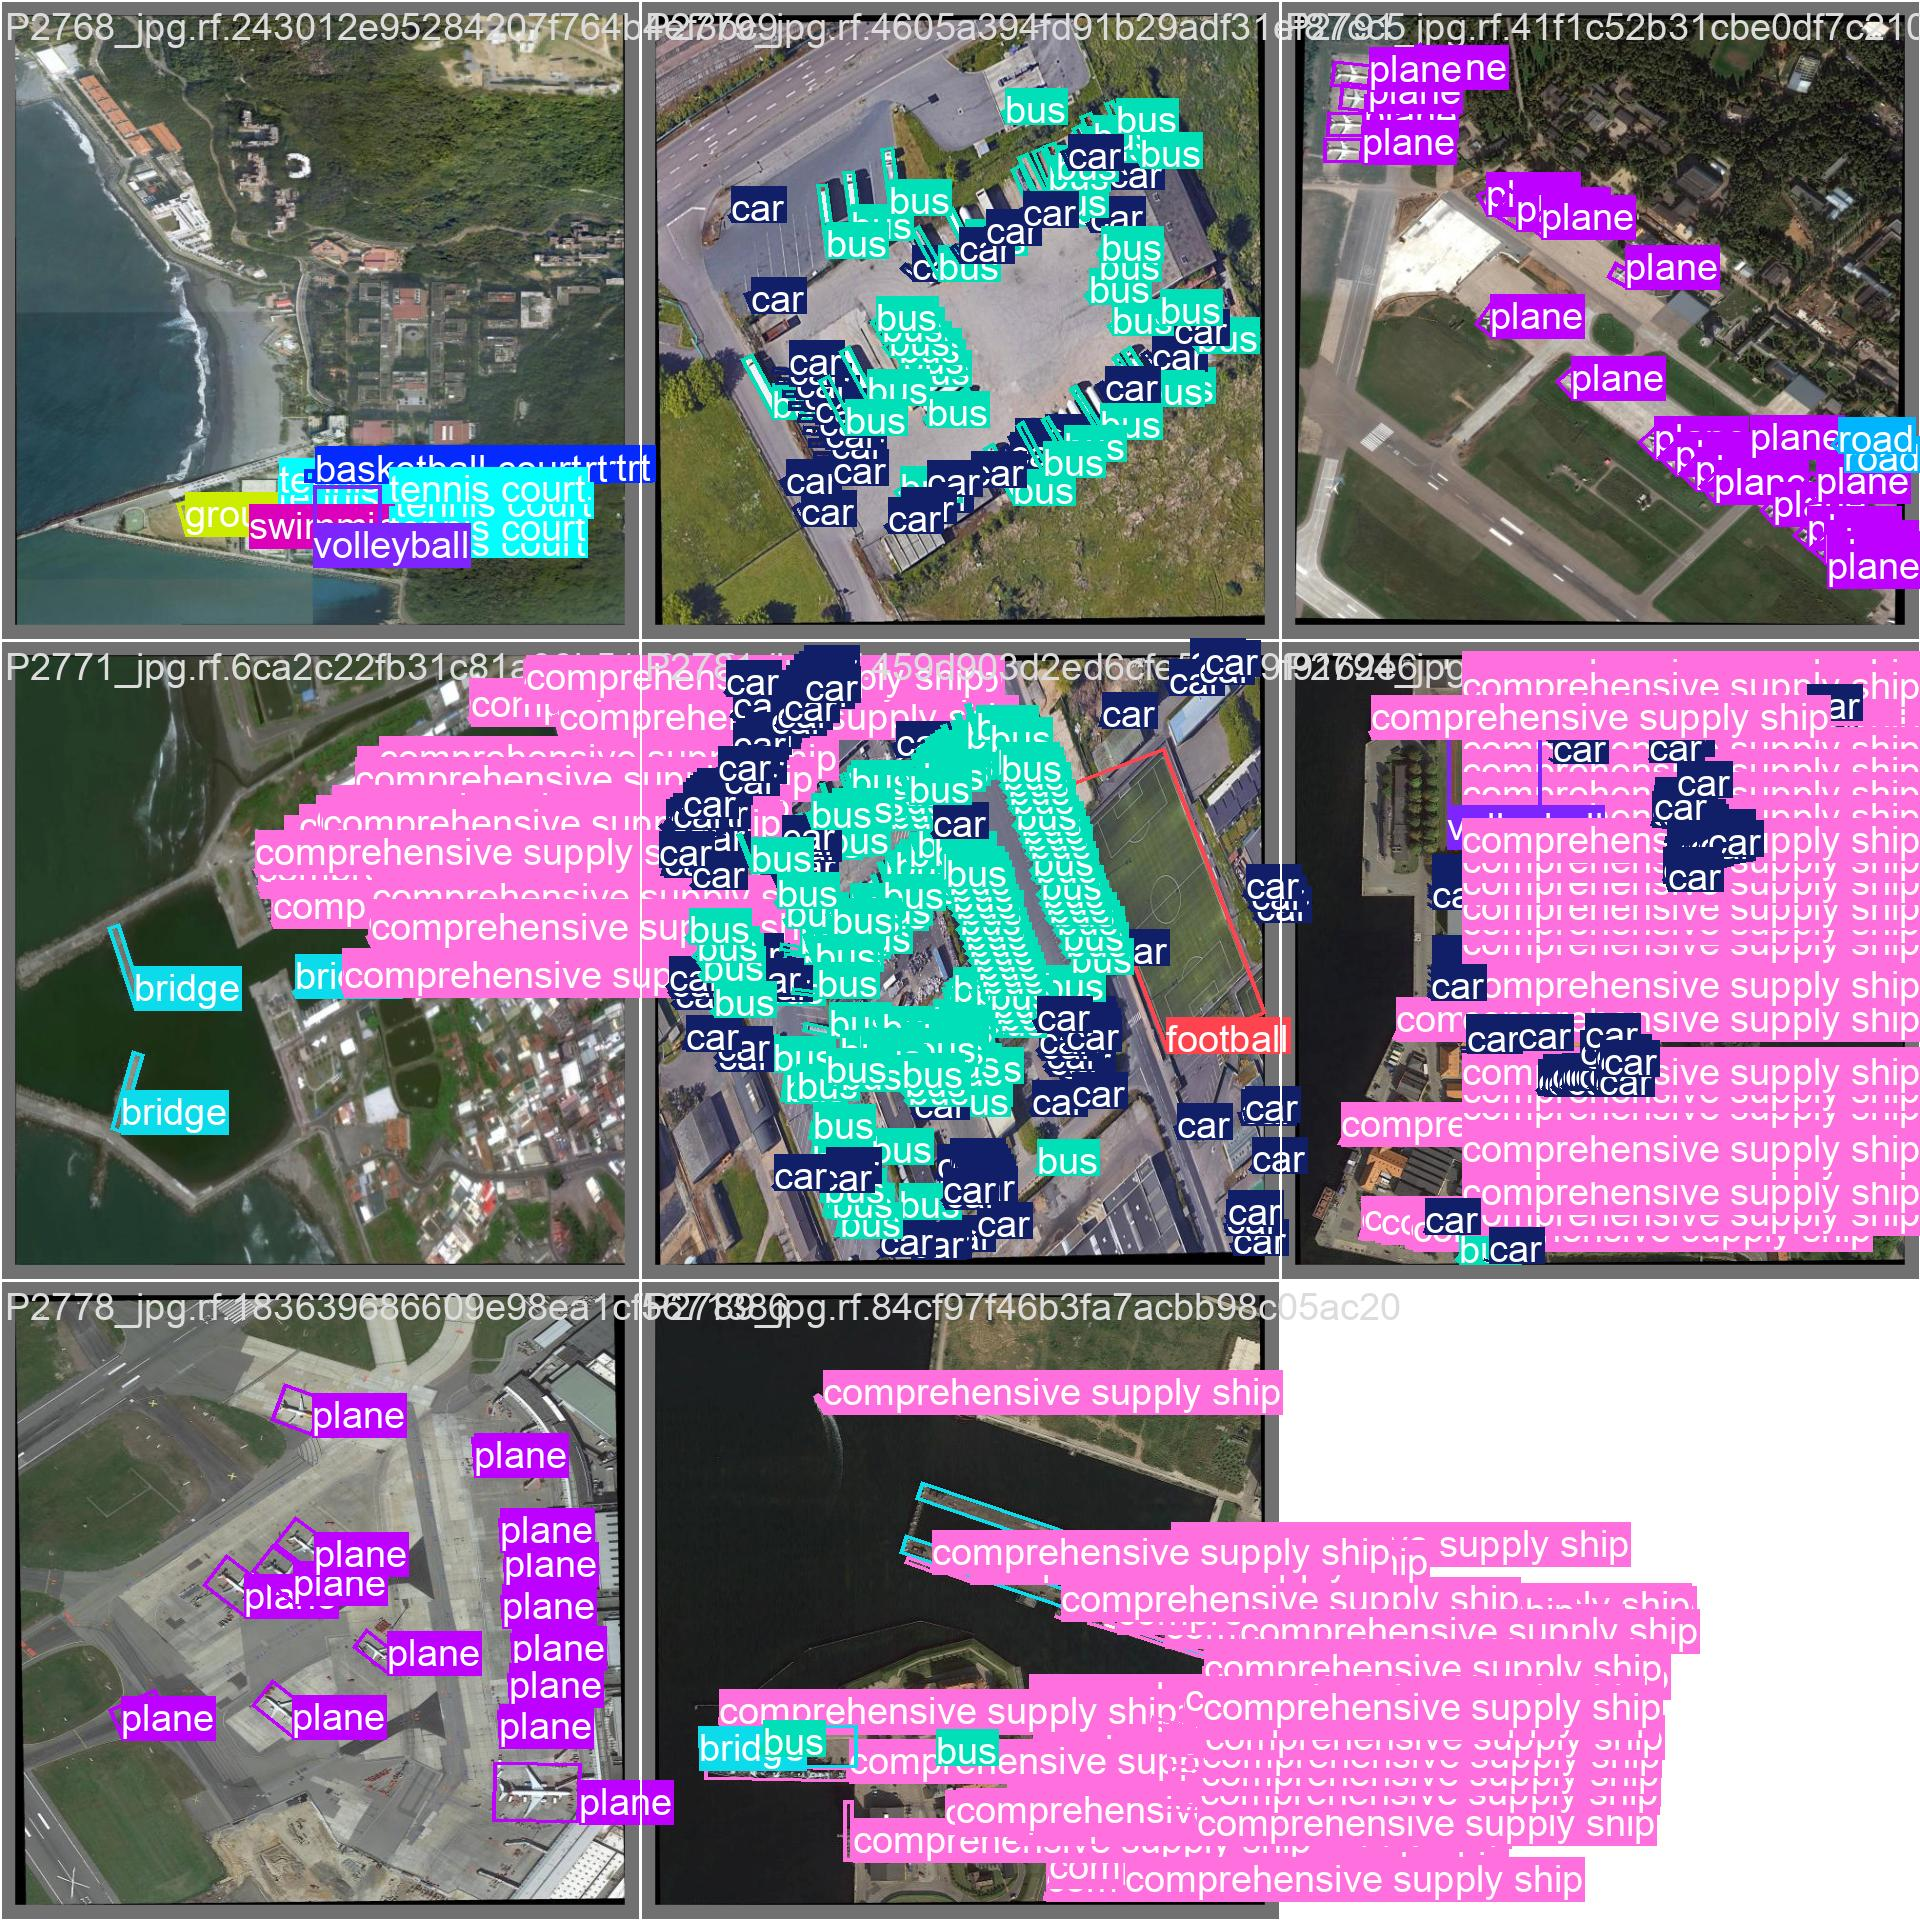

In [ ]:
%cd {HOME}
Image(filename='/content/runs/obb/train3/val_batch0_labels.jpg', width=600)

## Inference with Custom Model

In [ ]:

%cd {HOME}
# Run OBB prediction on test images with confidence ≥ 0.5 and save results
!yolo task=obb mode=predict model=/content/datasets/runs/obb/train/weights/best.pt conf=0.5 source=/content/datasets/datasets/dottttta1.0-9/test/images save=true

/content/datasets
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-obb summary (fused): 81 layers, 11,417,763 parameters, 0 gradients, 29.5 GFLOPs

image 1/208 /content/datasets/datasets/dottttta1.0-9/test/images/P1616_jpg.rf.a463b3181a26bf3f6cf229fe00db49ca.jpg: 640x640 (no detections), 17.4ms
image 2/208 /content/datasets/datasets/dottttta1.0-9/test/images/P1617_jpg.rf.52492553c8658d39cbe1ee6b201b2f93.jpg: 640x640 None17.3ms
image 3/208 /content/datasets/datasets/dottttta1.0-9/test/images/P1620_jpg.rf.9200a4cdea09e00f30577658e085791e.jpg: 640x640 (no detections), 17.3ms
image 4/208 /content/datasets/datasets/dottttta1.0-9/test/images/P1634_jpg.rf.0f9d9fcab6c6e48a136b890fd5ca281e.jpg: 640x640 None17.2ms
image 5/208 /content/datasets/datasets/dottttta1.0-9/test/images/P1659_jpg.rf.ac8e5e1b546b75238e9ac9944a8495bb.jpg: 640x640 (no detections), 17.2ms
image 6/208 /content/datasets/datasets/dottttta1.0-9/test/images/P1660_jpg.rf.d4336c181734465021

In [ ]:

%cd {HOME}
# Run OBB prediction on test images with confidence ≥ 0.5 and save results
!yolo task=obb mode=predict model=/content/datasets/runs/obb/train/weights/best.pt conf=0.5 source=/content/datasets/datasets/dottttta1.0-9/test/images save=true

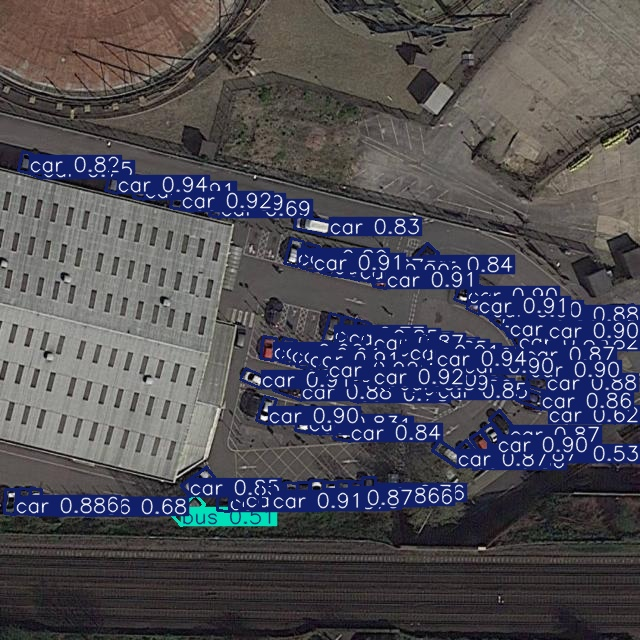

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/obb/predict3/P1846_jpg.rf.75a67861bdf0d500f34c8abb618e79e6.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

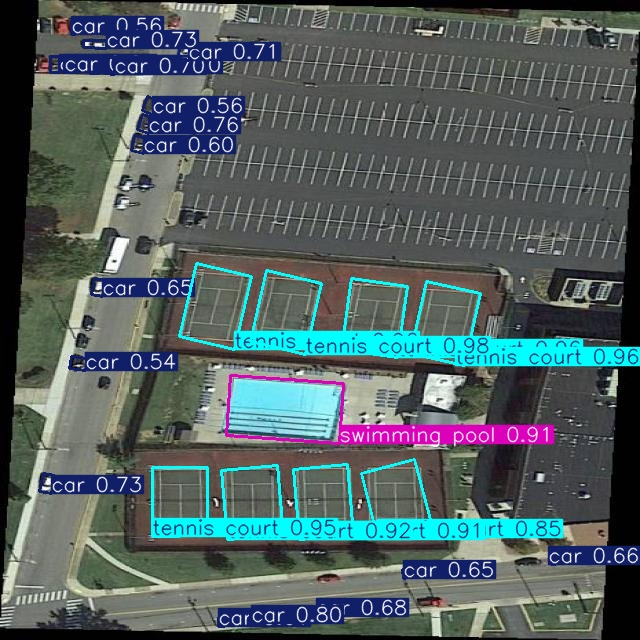

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/obb/predict3/P1932_jpg.rf.b14ded1148e1cbe89f60bc114bfb6f23.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

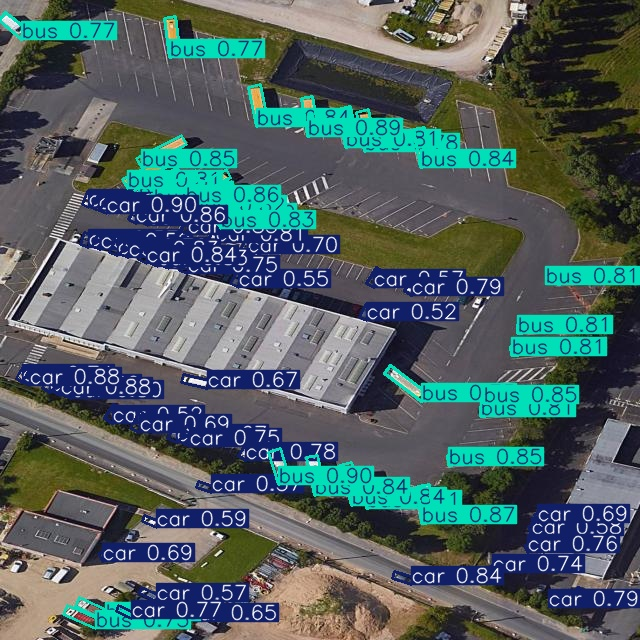

In [ ]:
for image_path in glob.glob('/content/runs/obb/predict3/P2004_jpg.rf.7a06d288e05685b07517d310b39c712d.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

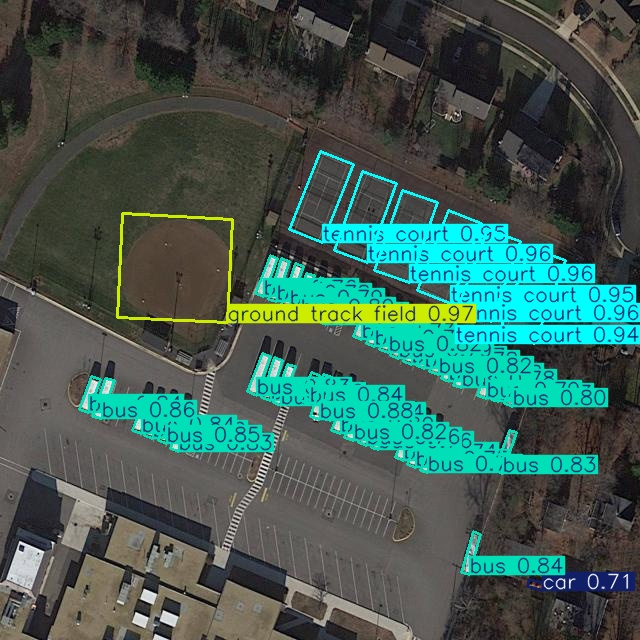

In [ ]:
for image_path in glob.glob('//content/runs/obb/predict3/P2100_jpg.rf.b36c4330ced5130a49a5ca4ba0427fff.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

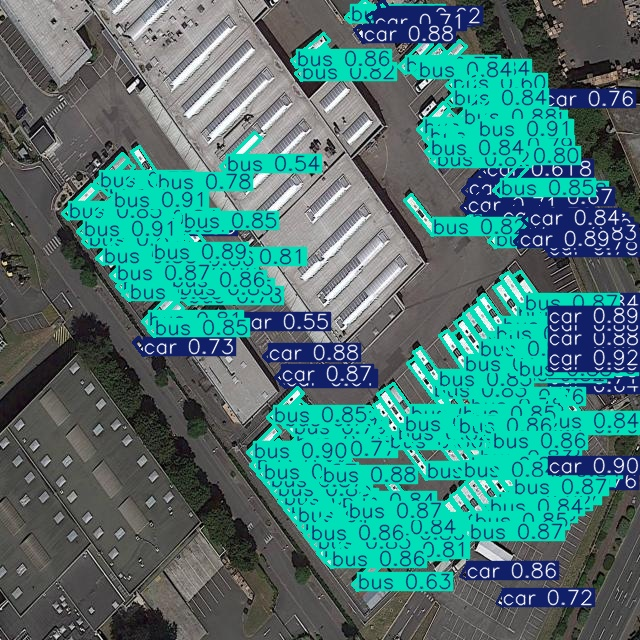

In [ ]:
for image_path in glob.glob('/content/runs/obb/predict3/P1945_jpg.rf.57625dc3d5205f13aa94d49fdf5fb971.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

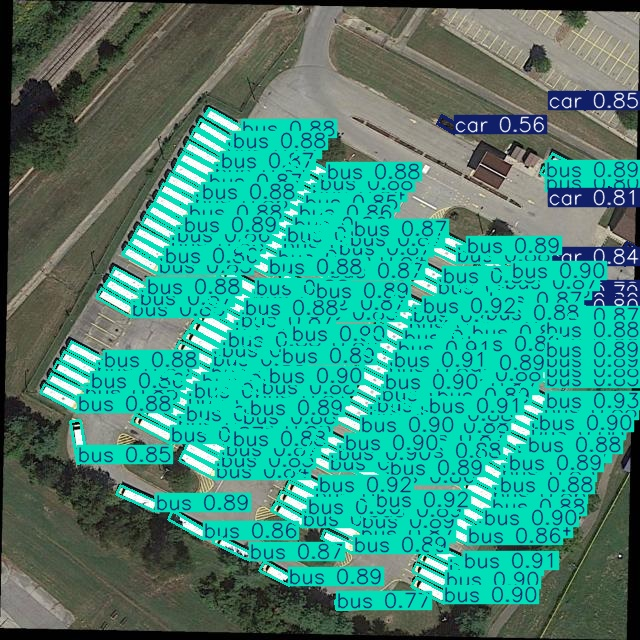

In [ ]:
for image_path in glob.glob('/content/runs/obb/predict3/P2053_jpg.rf.4aa0b77aa25a683be595b4d2b7810cc3.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

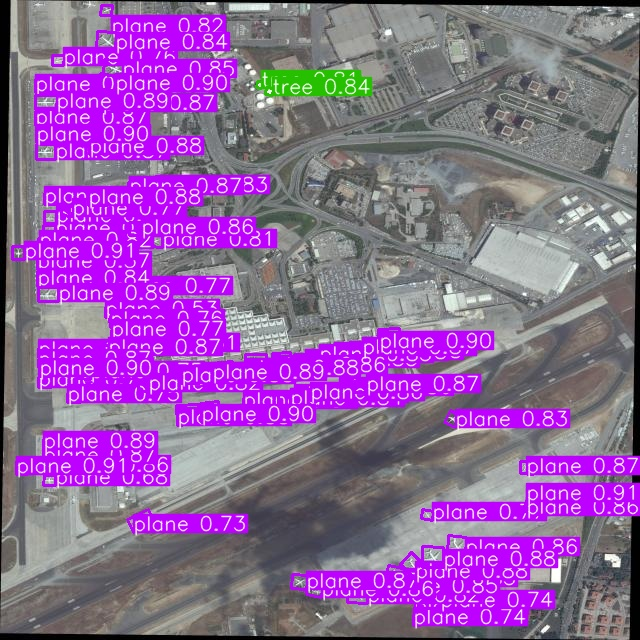

In [ ]:
for image_path in glob.glob('/content/runs/obb/predict3/P1872_jpg.rf.dee942d836999d3939fcdaf604a14dee.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!yolo detect predict model = yolov8s-obb.pt source = "/content/4430425-uhd_3840_2160_24fps.mp4"

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-obb summary (fused): 81 layers, 11,417,376 parameters, 0 gradients, 29.4 GFLOPs

video 1/1 (frame 1/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None53.0ms
video 1/1 (frame 2/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None21.8ms
video 1/1 (frame 3/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None21.2ms
video 1/1 (frame 4/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None21.2ms
video 1/1 (frame 5/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None24.5ms
video 1/1 (frame 6/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None21.2ms
video 1/1 (frame 7/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None21.2ms
video 1/1 (frame 8/458) /content/4430425-uhd_3840_2160_24fps.mp4: 576x1024 None21.2ms
video 1

In [ ]:
!yolo detect predict model = /content/datasets/runs/obb/train/weights/best.pt source = "/content/datasets/Screenshot 2025-06-02 111652.png"

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-obb summary (fused): 81 layers, 11,417,763 parameters, 0 gradients, 29.5 GFLOPs

image 1/1 /content/datasets/Screenshot 2025-06-02 111652.png: 384x640 None49.9ms
Speed: 2.3ms preprocess, 49.9ms inference, 160.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/obb/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from google.colab import drive
drive.mount('/content/drive')